In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(filepath):
    blanks = 0
    conteo = 0
    data = []
    
    with open(filepath, mode='r') as file:
        csv_reader = csv.reader(file, delimiter=';')

        for row in csv_reader:
            if all(cell.strip() == "" for cell in row):
                blanks += 1
            conteo += 1

            if blanks == 2:
                data.append(row)

        columns = data[3]
        data = data[4:]
        
    df = pd.DataFrame(data, columns=columns)
    df = df.replace(',', '.', regex=True)
    df = df.replace(r'^\s*$', 0, regex=True)
    return df

In [3]:
# Leer el archivo CSV
df = read_csv('uploads/SPG_001.csv')

C:\Users\DiDi\AppData\Local\Temp\ipykernel_26260\1955286787.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r'^\s*$', 0, regex=True)


In [4]:
# Seleccionar solo las columnas de Magnitudes (ignorando la primera columna que es la frecuencia)
magnitude_columns = df.columns[1:]

# Tomar 50 columnas aleatorias de las columnas de magnitud
random_columns = df[magnitude_columns].sample(n=50, axis=1, random_state=42)  # random_state es para reproducibilidad

# Convertir las columnas seleccionadas a tipo float (reemplazar errores con 0 si es necesario)
random_columns = random_columns.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calcular el promedio de magnitudes por fila solo con las 50 columnas aleatorias
df['Average Magnitude [dBm]'] = random_columns.mean(axis=1)

# Calcular el promedio general de todas las filas de 'Average Magnitude [dBm]'
overall_average = df['Average Magnitude [dBm]'].mean()

# Aplicar la condición de dejar a 0 los valores por debajo del promedio general
df['Filtered Average Magnitude [dBm]'] = df['Average Magnitude [dBm]'].apply(lambda x: x if x >= overall_average else 0)

# Mostrar el DataFrame con las columnas seleccionadas, el nuevo promedio y el promedio filtrado
print(df[['Frequency [Hz]', 'Average Magnitude [dBm]', 'Filtered Average Magnitude [dBm]']])

df

       Frequency [Hz]  Average Magnitude [dBm]  \
0           400000000               -89.098056   
1    400079365.079365               -89.098300   
2     400158730.15873               -89.239173   
3    400238095.238095               -89.166295   
4     400317460.31746               -89.890683   
..                ...                      ...   
626   449682539.68254               -93.239418   
627  449761904.761905               -92.829249   
628   449841269.84127               -92.840479   
629  449920634.920635               -93.121861   
630         450000000               -92.375743   

     Filtered Average Magnitude [dBm]  
0                          -89.098056  
1                          -89.098300  
2                          -89.239173  
3                          -89.166295  
4                            0.000000  
..                                ...  
626                          0.000000  
627                          0.000000  
628                          0.000000  

C:\Users\DiDi\AppData\Local\Temp\ipykernel_26260\1443759555.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Average Magnitude [dBm]'] = random_columns.mean(axis=1)
C:\Users\DiDi\AppData\Local\Temp\ipykernel_26260\1443759555.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Filtered Average Magnitude [dBm]'] = df['Average Magnitude [dBm]'].apply(lambda x: x if x >= overall_average else 0)


,Frequency [Hz],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],...,Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],Magnitude [dBm],,Average Magnitude [dBm],Filtered Average Magnitude [dBm]
0,400000000,-88.7600326538086,-90.0662231445313,-91.677604675293,-89.3398818969727,-89.4680633544922,-88.9492492675781,-89.4497528076172,-89.5352020263672,-87.4721527099609,...,-84.4019927978516,-85.9584350585938,-90.0906372070313,-88.9187316894531,-91.805778503418,-91.0489196777344,-87.8749923706055,0,-89.098056,-89.098056
1,400079365.079365,-88.7600326538086,-90.0601196289063,-91.671501159668,-89.3398818969727,-89.4680633544922,-88.9492492675781,-89.4497528076172,-89.5352020263672,-87.4721527099609,...,-84.4019927978516,-85.9584350585938,-90.0906372070313,-88.9187316894531,-91.805778503418,-91.0489196777344,-87.8749923706055,0,-89.098300,-89.098300
2,400158730.15873,-89.7427291870117,-88.9736633300781,-89.3581924438477,-89.7244186401367,-87.3439712524414,-88.4060211181641,-90.3042678833008,-88.8576889038086,-86.7091903686523,...,-85.2504043579102,-86.7275009155273,-90.1821975708008,-87.9970703125,-91.854606628418,-89.2483291625977,-87.4904632568359,0,-89.239173,-89.239173
3,400238095.238095,-89.5229949951172,-88.8882141113281,-89.6023406982422,-89.2910537719727,-90.7559432983398,-89.2727432250977,-90.6704940795898,-90.9817810058594,-90.5117950439453,...,-83.834342956543,-85.7509078979492,-90.0967407226563,-89.3093643188477,-90.0662231445313,-90.1028442382813,-89.9746704101563,0,-89.166295,-89.166295
4,400317460.31746,-89.3703994750977,-91.5921478271484,-88.0703125,-88.9919738769531,-90.4446563720703,-89.0652160644531,-91.5555267333984,-88.7966537475586,-89.1995010375977,...,-86.4040069580078,-84.9757385253906,-89.5474090576172,-88.4243316650391,-91.720329284668,-89.1506729125977,-90.3347854614258,0,-89.890683,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,449682539.68254,-90.0723266601563,-93.0082092285156,-93.0875549316406,-91.1954116821289,-91.5799407958984,-91.8973388671875,-93.2523574829102,-91.0184020996094,-94.8026962280273,...,-94.0946655273438,-93.9176635742188,-90.2676467895508,-95.4191741943359,-92.9166564941406,-93.7406539916992,-91.3235855102539,0,-93.239418,0.000000
627,449761904.761905,-91.5311126708984,-90.8413925170898,-91.1587905883789,-90.9756774902344,-91.8912353515625,-93.2950820922852,-92.7579574584961,-90.5667266845703,-91.5005950927734,...,-92.7335433959961,-93.0509338378906,-90.9085388183594,-94.8026962280273,-95.4130706787109,-94.5280303955078,-93.5819549560547,0,-92.829249,0.000000
628,449841269.84127,-90.9695739746094,-92.1231689453125,-91.799674987793,-92.4344635009766,-92.287971496582,-92.312385559082,-93.3133926391602,-91.9827880859375,-92.8434066772461,...,-91.9583740234375,-92.7152328491211,-91.1404800415039,-93.7589645385742,-94.2838821411133,-93.1669082641602,-93.9970092773438,0,-92.840479,0.000000
629,449920634.920635,-89.7732467651367,-92.281867980957,-94.3388137817383,-91.9644775390625,-93.1180725097656,-93.9420776367188,-91.5311126708984,-91.866813659668,-91.1343765258789,...,-90.8719100952148,-93.4171600341797,-90.5667266845703,-92.275764465332,-92.3856353759766,-93.2035293579102,-94.6012725830078,0,-93.121861,0.000000


In [5]:
max = -9999999
values = []
for index, value in df['Filtered Average Magnitude [dBm]'].items():
    if value > max and value != 0:
        max = value
    if value == 0 and max != -9999999:
        values.append((index, max))
        max = -9999999
print(values)

[(4, -89.09805603027344), (413, -89.05606292724609), (437, -89.35245864868165), (544, -69.69951499938966), (554, -86.25641632080078)]


In [6]:
df['Frequency [Hz]'] = pd.to_numeric(df['Frequency [Hz]'], errors='coerce')
df['Average Magnitude [dBm]'] = pd.to_numeric(df['Average Magnitude [dBm]'], errors='coerce')

In [7]:
one = None
two = None
for index, value in values:
    if (df["Frequency [Hz]"][index] >= 430 and df["Frequency [Hz]"][index] <= 440) and (two is None or df["Frequency [Hz]"][two] < df["Frequency [Hz]"][index]):
        two = index - 1
    elif one is None or df["Frequency [Hz]"][index] > df["Frequency [Hz]"][one]:
        one = index - 1

In [8]:
datos_one_mag = []
datos_one_frec = []
if one is not None:
    min_one = None
    max_one = None
    one_step = one
    while 0 < one_step:
        one_step -= 1
    min_one = one_step
    while df["Filtered Average Magnitude [dBm]"][one_step] != 0:
        one_step += 1
        datos_one_mag.append(df["Filtered Average Magnitude [dBm]"][one_step])
        datos_one_frec.append(df["Frequency [Hz]"][one_step])
    max_one = one_step

In [9]:
datos_two_mag = []
datos_two_frec = []
if two is not None:
    min_two = None
    max_two = None
    two_step = two
    while 0 < two_step:
        two_step -= 1
    min_two = two_step
    while df["Filtered Average Magnitude [dBm]"][two_step] != 0:
        two_step += 1
        datos_two_mag.append(df["Filtered Average Magnitude [dBm]"][two_step])
        datos_two_frec.append(df["Frequency [Hz]"][two_step])
    max_two = two_step

In [10]:
# Función para crear un histograma basado en magnitud y frecuencia
def crear_histograma(frecuencia, magnitud, titulo):
    plt.figure(figsize=(10, 6))
    plt.bar(frecuencia, magnitud, width=500000, edgecolor='black')  # La barra se muestra por frecuencia
    plt.title(f'Histograma de {titulo}')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dBm]')
    plt.show()

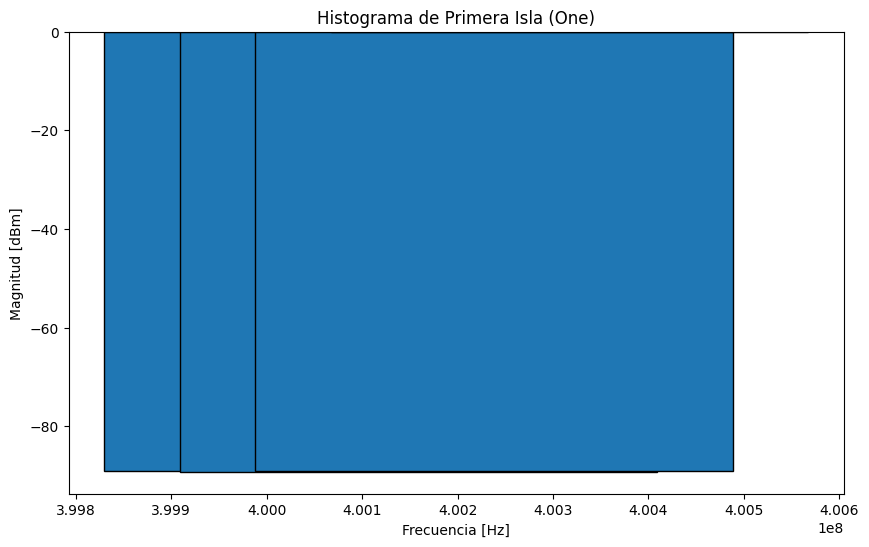

In [11]:
# Histograma para la primera isla (one)
if datos_one_mag and datos_one_frec:
    crear_histograma(datos_one_frec, datos_one_mag, "Primera Isla (One)")

In [12]:
# Histograma para la segunda isla (two)
if datos_two_mag and datos_two_frec:
    crear_histograma(datos_two_frec, datos_two_mag, "Segunda Isla (Two)")

In [13]:
# 1. Frecuencia central: La frecuencia en la cual la señal tiene su mayor amplitud.
def calcular_frecuencia_central(df):
    max_index = df['Filtered Average Magnitude [dBm]'].idxmax()  # Índice de la magnitud máxima
    return df['Frequency [Hz]'][max_index]  # Frecuencia correspondiente

In [14]:
# 2. Ancho de banda (BW): Diferencia entre la frecuencia mínima y máxima dentro del rango de la señal.
def calcular_ancho_de_banda(df):
    freqs_con_magnitud = df[df['Filtered Average Magnitude [dBm]'] != 0]['Frequency [Hz]']
    return (freqs_con_magnitud.max() - freqs_con_magnitud.min())

In [15]:
# 3. Amplitud/Potencia: Máxima potencia de la señal (en dBm).
def calcular_amplitud(df):
    return df['Filtered Average Magnitude [dBm]'].max()


In [16]:
# 4. Nivel de ruido: Promedio de las magnitudes que están por debajo de un umbral bajo (considerado como ruido).
def calcular_nivel_ruido(df, umbral_ruido=-100):
    ruido = df[df['Filtered Average Magnitude [dBm]'] < umbral_ruido]['Filtered Average Magnitude [dBm]']
    return ruido.mean() if not ruido.empty else None

In [17]:
# 5. Relación señal-ruido (SNR): La diferencia entre la amplitud máxima y el nivel de ruido.
def calcular_snr(df, umbral_ruido=-100):
    amplitud_max = calcular_amplitud(df)
    nivel_ruido = calcular_nivel_ruido(df, umbral_ruido)
    return amplitud_max - nivel_ruido if nivel_ruido is not None else None

In [18]:
# 6. Picos espectrales: Puntos donde la amplitud es máxima dentro del ancho de banda.
def encontrar_picos(df):
    return df[df['Filtered Average Magnitude [dBm]'] > 0][['Frequency [Hz]', 'Filtered Average Magnitude [dBm]']]

In [19]:
# 7. Frecuencias espurias: Señales indeseadas que están lejos de la señal principal.
def encontrar_frecuencias_espurias(df, umbral=-80):
    espurias = df[df['Filtered Average Magnitude [dBm]'] < umbral]
    return espurias[['Frequency [Hz]', 'Filtered Average Magnitude [dBm]']]

In [20]:
# 8. Drift de frecuencia: Cambios en la frecuencia central de la señal a lo largo del tiempo.
def calcular_drift_frecuencia(frecuencia_inicial, frecuencia_final):
    return frecuencia_final - frecuencia_inicial

In [21]:
# 9. Tiempo de ocupación: Tiempo durante el cual la señal está presente (puedes definir los datos temporales si están disponibles).
def calcular_tiempo_ocupacion(tiempos):
    return tiempos.max() - tiempos.min()

In [22]:
# 10. Crest factor: Relación entre el pico de la señal y su valor RMS (Root Mean Square).
def calcular_crest_factor(df):
    pico = calcular_amplitud(df)
    rms = np.sqrt(np.mean(np.square(df['Filtered Average Magnitude [dBm]'])))
    return pico / rms if rms != 0 else None

In [23]:
# Datos de prueba
data = {
    'Frequency [Hz]': np.linspace(0, 1000000, 100),
    'Filtered Average Magnitude [dBm]': np.random.uniform(-120, 0, 100)
}
df = pd.DataFrame(data)

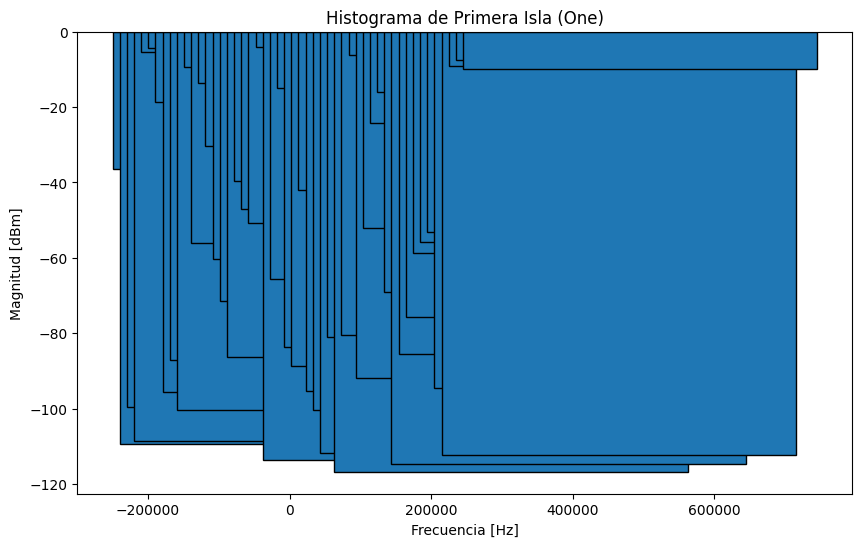

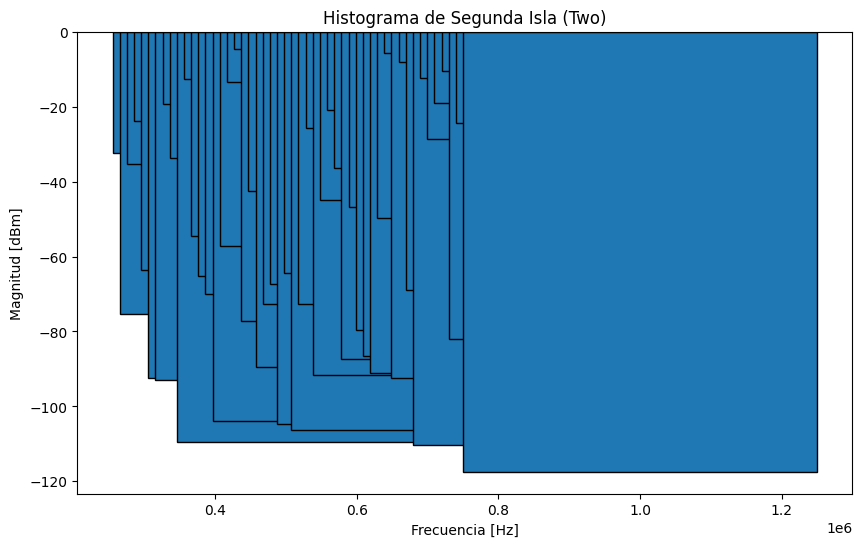

In [24]:
# Histograma de prueba
datos_one_mag = df['Filtered Average Magnitude [dBm]'][:50]
datos_one_frec = df['Frequency [Hz]'][:50]

datos_two_mag = df['Filtered Average Magnitude [dBm]'][50:]
datos_two_frec = df['Frequency [Hz]'][50:]

# Prueba de creación de histogramas
if datos_one_mag.any() and datos_one_frec.any():
    crear_histograma(datos_one_frec, datos_one_mag, "Primera Isla (One)")

if datos_two_mag.any() and datos_two_frec.any():
    crear_histograma(datos_two_frec, datos_two_mag, "Segunda Isla (Two)")

In [25]:
# 1. Prueba de frecuencia central
frecuencia_central = calcular_frecuencia_central(df)
print("Frecuencia central:", frecuencia_central)

Frecuencia central: 202020.202020202


In [26]:
# 2. Prueba de ancho de banda
ancho_banda = calcular_ancho_de_banda(df)
print("Ancho de banda:", ancho_banda)

Ancho de banda: 1000000.0


In [27]:
# 3. Prueba de amplitud
amplitud = calcular_amplitud(df)
print("Amplitud máxima:", amplitud)

Amplitud máxima: -4.086125893050877


In [28]:
# 4. Prueba de nivel de ruido
nivel_ruido = calcular_nivel_ruido(df, umbral_ruido=-100)
print("Nivel de ruido:", nivel_ruido)

Nivel de ruido: -109.34048005378004


In [29]:
# 5. Prueba de relación señal-ruido (SNR)
snr = calcular_snr(df, umbral_ruido=-100)
print("Relación señal-ruido (SNR):", snr)

Relación señal-ruido (SNR): 105.25435416072916


In [30]:
# 6. Prueba de picos espectrales
picos = encontrar_picos(df)
print("Picos espectrales:\n", picos)

Picos espectrales:
 Empty DataFrame
Columns: [Frequency [Hz], Filtered Average Magnitude [dBm]]
Index: []


In [31]:
# 7. Prueba de frecuencias espurias
frecuencias_espurias = encontrar_frecuencias_espurias(df, umbral=-80)
print("Frecuencias espurias:\n", frecuencias_espurias)

Frecuencias espurias:
     Frequency [Hz]  Filtered Average Magnitude [dBm]
1     10101.010101                       -109.421239
2     20202.020202                        -99.570820
3     30303.030303                       -108.652010
7     70707.070707                        -95.543701
8     80808.080808                        -87.092298
9     90909.090909                       -100.462522
16   161616.161616                        -86.434085
21   212121.212121                       -113.573105
24   242424.242424                        -83.546665
25   252525.252525                        -88.735678
27   272727.272727                        -95.300279
28   282828.282828                       -100.486487
29   292929.292929                       -111.828840
30   303030.303030                        -80.871090
31   313131.313131                       -116.747224
32   323232.323232                        -80.349478
34   343434.343434                        -91.916233
39   393939.393939     

In [32]:
# 8. Prueba de drift de frecuencia
frecuencia_inicial = 500000
frecuencia_final = 600000
drift = calcular_drift_frecuencia(frecuencia_inicial, frecuencia_final)
print("Drift de frecuencia:", drift)

Drift de frecuencia: 100000


In [33]:
# 9. Prueba de tiempo de ocupación
tiempos = pd.Series(np.linspace(0, 10, 100))  # Simulando tiempos de 0 a 10 segundos
tiempo_ocupacion = calcular_tiempo_ocupacion(tiempos)
print("Tiempo de ocupación:", tiempo_ocupacion)

Tiempo de ocupación: 10.0


In [34]:
# 10. Prueba de crest factor
crest_factor = calcular_crest_factor(df)
print("Crest factor:", crest_factor)

Crest factor: -0.05910181743338322


In [35]:
def graficar_forma_de_senal(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Frequency [Hz]'], df['Filtered Average Magnitude [dBm]'])
    plt.title('Forma de la señal')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dBm]')
    plt.grid(True)
    plt.show()

In [36]:
def encontrar_frecuencias_armonicas(df, frecuencia_fundamental):
    armonicas = df[df['Frequency [Hz]'] % frecuencia_fundamental == 0]
    return armonicas[['Frequency [Hz]', 'Filtered Average Magnitude [dBm]']]

In [37]:
def encontrar_interferencias(df, umbral=-80):
    interferencias = df[df['Filtered Average Magnitude [dBm]'] < umbral]
    return interferencias[['Frequency [Hz]', 'Filtered Average Magnitude [dBm]']]

In [38]:
def analizar_ancho_de_banda_ocupacion(df):
    freqs_con_magnitud = df[df['Filtered Average Magnitude [dBm]'] != 0]['Frequency [Hz]']
    return freqs_con_magnitud.max() - freqs_con_magnitud.min()

In [39]:
def calcular_frecuencia_repeticion_pulso(tiempos):
    # Asume que tienes datos de tiempo donde se detectan los pulsos
    if len(tiempos) < 2:
        return None
    difs = np.diff(tiempos)
    return 1 / difs.mean()  # La PRF es el inverso del tiempo promedio entre pulsos

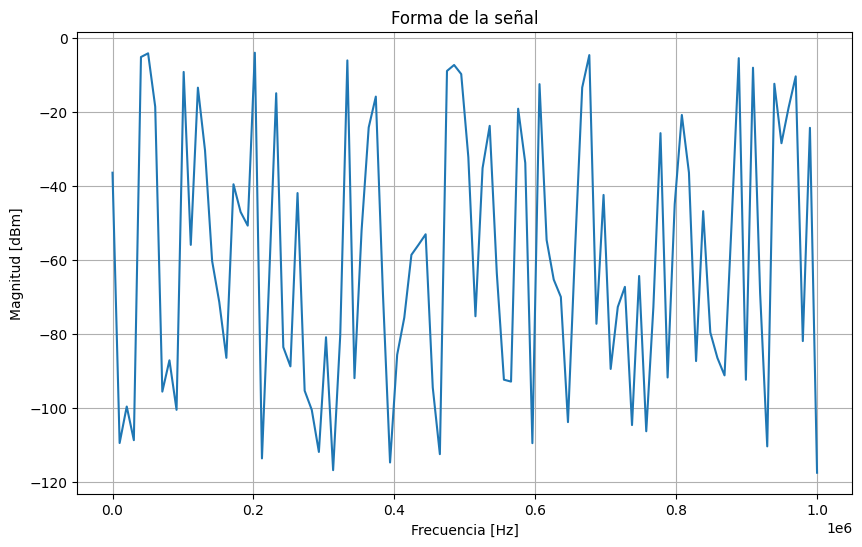

In [40]:
graficar_forma_de_senal(df)

In [41]:
encontrar_frecuencias_armonicas(df, frecuencia_fundamental=1000)

,Frequency [Hz],Filtered Average Magnitude [dBm]
0,0.0,-36.467377
99,1000000.0,-117.437480


In [42]:
encontrar_interferencias(df, umbral=-80)

,Frequency [Hz],Filtered Average Magnitude [dBm]
1,10101.010101,-109.421239
2,20202.020202,-99.570820
3,30303.030303,-108.652010
7,70707.070707,-95.543701
8,80808.080808,-87.092298
9,90909.090909,-100.462522
16,161616.161616,-86.434085
21,212121.212121,-113.573105
24,242424.242424,-83.546665
25,252525.252525,-88.735678


In [43]:
analizar_ancho_de_banda_ocupacion(df)

np.float64(1000000.0)

In [44]:
calcular_frecuencia_repeticion_pulso(tiempos)

np.float64(9.899999999999999)